 # Tutorial Data Handling
 # Table of Contents
 1. [Introduction](#introduction)
 2. [Data Input](#data)
 3. [Descriptive Statistics](#descriptive)
 4. [Plotting](#plot)
 5. [](#test)
 


# 
   

 
 # Introduction
<a id="introduction"></a>


TODO: 
-> Motivation why data handling is important
-> 
-> Not only for Data analysis but also relevant for modelling as soon as calibration is needed.
-> Goal of this Totorial (what to expect in the rest of the tutorial)
























# Data Input
<a id="data"></a>

To do any data related task we first have to get the data into the Julia enviroment. In this section we cover some of the options currently available.
First of all we can enter the data manually into Julia. As we will later work with the classical Iris dataset we show how we could enter at least part of that data manually. First we create an empty DataFrame with the correct structure and column types. Then with the vcat() function we add one entry into this dataframe.  

In [10]:
# Create an empty DataFrame 
df = DataFrame(petalLength=Float64[], 
    sepalWidth=Float64[], 
    sepalLength=Float64[], 
    petalWidth=Float64[], 
    species=String[])
# Add one entry to the DataFrame
df = vcat(df, DataFrame(petalLength=1.4, sepalWidth = 3.5, sepalLength =5.1, petalWidth = 0.2, species ="setosa"))

,petalLength,sepalWidth,sepalLength,petalWidth,species
,Float64,Float64,Float64,Float64,String
1,1.4,3.5,5.1,0.2,setosa


As we can see this code created a DataFrame with measurements for one iris flower. It is clear that although it would be possible to enter as many observations as we want that way that this is not a good way to do it. Even if we collect data our selfs we would normaly prefer to enter it either in to excel or a statistical package instead of the process shown above. So as a practical advise only use the manual entry of data for parameters other then that use import function developed for julia.

## Data import

To get data imported into Julia

In [3]:
using Pkg
using VegaDatasets
using DataFrames
using FileIO
using ExcelFiles
using Query
iris = DataFrame(dataset("Iris"))
iris |> save("iris.csv")
#iris |> save("iris.xlsx")


In [88]:
test = DataFrame(load("iris.csv"))
#test = load("iris.xlsx", "Sheet1")

MethodError: MethodError: no method matching DataFrame(::DataFrame; b=150×5 DataFrame
│ Row │ petalLength │ sepalWidth │ sepalLength │ petalWidth │ species   │
│     │ Float64     │ Float64    │ Float64     │ Float64    │ String    │
├─────┼─────────────┼────────────┼─────────────┼────────────┼───────────┤
│ 1   │ 1.4         │ 3.5        │ 5.1         │ 0.2        │ setosa    │
│ 2   │ 1.4         │ 3.0        │ 4.9         │ 0.2        │ setosa    │
│ 3   │ 1.3         │ 3.2        │ 4.7         │ 0.2        │ setosa    │
│ 4   │ 1.5         │ 3.1        │ 4.6         │ 0.2        │ setosa    │
│ 5   │ 1.4         │ 3.6        │ 5.0         │ 0.2        │ setosa    │
│ 6   │ 1.7         │ 3.9        │ 5.4         │ 0.4        │ setosa    │
│ 7   │ 1.4         │ 3.4        │ 4.6         │ 0.3        │ setosa    │
│ 8   │ 1.5         │ 3.4        │ 5.0         │ 0.2        │ setosa    │
│ 9   │ 1.4         │ 2.9        │ 4.4         │ 0.2        │ setosa    │
│ 10  │ 1.5         │ 3.1        │ 4.9         │ 0.1        │ setosa    │
⋮
│ 140 │ 5.4         │ 3.1        │ 6.9         │ 2.1        │ virginica │
│ 141 │ 5.6         │ 3.1        │ 6.7         │ 2.4        │ virginica │
│ 142 │ 5.1         │ 3.1        │ 6.9         │ 2.3        │ virginica │
│ 143 │ 5.1         │ 2.7        │ 5.8         │ 1.9        │ virginica │
│ 144 │ 5.9         │ 3.2        │ 6.8         │ 2.3        │ virginica │
│ 145 │ 5.7         │ 3.3        │ 6.7         │ 2.5        │ virginica │
│ 146 │ 5.2         │ 3.0        │ 6.7         │ 2.3        │ virginica │
│ 147 │ 5.0         │ 2.5        │ 6.3         │ 1.9        │ virginica │
│ 148 │ 5.2         │ 3.0        │ 6.5         │ 2.0        │ virginica │
│ 149 │ 5.4         │ 3.4        │ 6.2         │ 2.3        │ virginica │
│ 150 │ 5.1         │ 3.0        │ 5.9         │ 1.8        │ virginica │)
Closest candidates are:
  DataFrame(::DataFrame; copycols) at C:\Users\A\.julia\packages\DataFrames\m9gd9\src\dataframe\dataframe.jl:135 got unsupported keyword argument "b"
  DataFrame(::T; copycols) where T at C:\Users\A\.julia\packages\DataFrames\m9gd9\src\other\tables.jl:20 got unsupported keyword argument "b"
  DataFrame(; kwargs...) at C:\Users\A\.julia\packages\DataFrames\m9gd9\src\dataframe\dataframe.jl:157
  ...

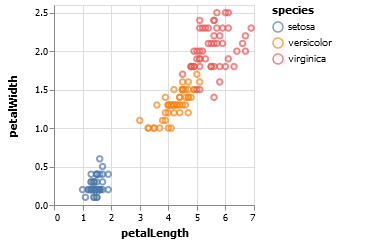

In [21]:
#Plotting petal size for the 3 different iris species
using VegaLite
iris |>
@vlplot(:point, x=:petalLength, y=:petalWidth, color="species:n")

# Histogram

#iris |>
#@vlplot(:bar, x="species",y="count()") 



# allenfalls mean der gruppen






#iris |> @vlplot(:point, x=:petalLength, y=:petalWidth, column=:species)

For some applications it might be great if we can get the user of the programm to enter values into julia. This is possible using the readline() function. We use a simple "programm" that calculates  


In [1]:
println("How many years are you saving?")
years = parse(Int8,readline())
println("Anual interest rate eg 0.05 for 5%")
interest_rate = parse(Float64,readline())
println("How much do you save every month?")
monthly_amount = parse(Float64,readline())
q= (1+interest_rate)^(1/12)
amount = round(monthly_amount*q*(q^(12*years)-1)/(q-1))
println("At the end of ", years, " years you saved ", amount)

How many years are you saving?
stdin> 10
Anual interest rate eg 0.05 for 5%
stdin> 0.05
stdin> 100
At the end of 10 years you saved 15499.0


# Plotting
<a id="plot"></a>

After importing a dataset and creating descriptive statistics a further usefull tool to explore data are graphs. In this section of the tutorial we show how to create basic plots using the VegaLite Package. It allows to create a huge variate of typically needed plots. We can obviously not cover all of them in this tutorial but instead focus on plot types we think are most usefull for everyone. If you wan't to do a different plot chances are good that you can find a example in the official documentation which can be found here. [http://fredo-dedup.github.io/VegaLite.jl/stable/]. We continue to use the Iris dataset to illustrate plotting. VegaLite is not limited to a specific data type as long as the data is in tabular form VegaLite can create plots out of them.
First of all we show how to create a scatterplot. We start with a basic version and then show some of the fundamental additional options which are usefull for most plots you create.

As can be seen in the code below we select a dataset and pipe it into the @vplot function. Then we define the sh


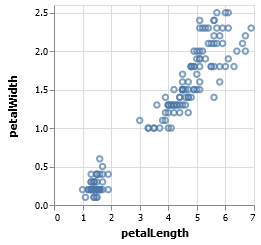

In [23]:
#Plotting petal size for the 3 different iris species
using VegaLite
iris |>
@vlplot(:point, x=:petalLength, y=:petalWidth)

In [ ]:
@vlplot(:point, x=:petalLength, y=:petalWidth, color="species:n")2

In [24]:
iris |>
@vlplot(:point)